# Keras LSTM analyzes IMDB film database sentiment 

Analyze 25000 movie reviews in IMDB if positive (1) or negative (0) sentiment. The data set already comes preprocessed with words transcribed to a number-encoded vocabulary.

## Loading IMDB sentiment data

In [1]:
from keras.layers.recurrent import LSTM
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000   # 20000 most common items from vocabulary
maxlen = 80   # word length of a review
batch_size = 32

Using TensorFlow backend.


In [2]:
# Workaround for numpy allow_pickle=False problem with the imdb data set. Downgrade of numpy version -- Does not belong in the normal modeling workflow. Will be fixed in future versions.

import numpy as np

#!pip install numpy==1.16.2
print('installed')
print(np.__version__)

installed
1.16.2


In [21]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# check the contents of the vectors. These are the encoded words and the positive/negative label.
print(len(x_train), 'Train Sequences')
print(len(x_test), 'Test Sequences')
print('\nFirst item features: ',x_train[0])
print('\nFirst item label: ',y_train[0])

25000 Train Sequences
25000 Test Sequences

First item features:  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5

## Padding sequences (reviews) that are too short and cutting too long

In [4]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (25000, 80)
x_test shape: (25000, 80)


## Defining LSTM model

In [5]:
model = Sequential()

model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))

# note: the output layer has only one single node meaning good (1) or bad (0)
model.add(Dense(1, activation='sigmoid'))

# not so nice model representation
model.summary()

W0812 20:33:35.326066  3536 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0812 20:33:35.357275  3536 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0812 20:33:35.372897  3536 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0812 20:33:35.513489  3536 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________



## Run and evaluate model

In [6]:
import tensorflow as tf

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.9)

tf.Session(config=tf.ConfigProto(gpu_options=gpu_options,allow_soft_placement=True))

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test))

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)

print('Test score: ', score)
print('Test accuracy: ', acc)

W0812 20:33:48.338649  3536 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0812 20:33:48.369881  3536 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0812 20:33:48.369881  3536 deprecation.py:323] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 119s 5ms/step - loss: 0.4626 - acc: 0.7799 - val_loss: 0.4105 - val_acc: 0.8165
Epoch 2/15
25000/25000 [==============================] - 117s 5ms/step - loss: 0.3053 - acc: 0.8739 - val_loss: 0.3775 - val_acc: 0.8360
Epoch 3/15
25000/25000 [==============================] - 119s 5ms/step - loss: 0.2237 - acc: 0.9133 - val_loss: 0.4074 - val_acc: 0.8352
Epoch 4/15
25000/25000 [==============================] - 121s 5ms/step - loss: 0.1598 - acc: 0.9402 - val_loss: 0.4674 - val_acc: 0.8259
Epoch 5/15
25000/25000 [==============================] - 116s 5ms/step - loss: 0.1151 - acc: 0.9587 - val_loss: 0.5536 - val_acc: 0.8230
Epoch 6/15
25000/25000 [==============================] - 122s 5ms/step - loss: 0.0832 - acc: 0.9701 - val_loss: 0.6500 - val_acc: 0.8208
Epoch 7/15
25000/25000 [==============================] - 118s 5ms/step - loss: 0.0634 - acc: 0.9784 - val_loss: 0.6933 - 

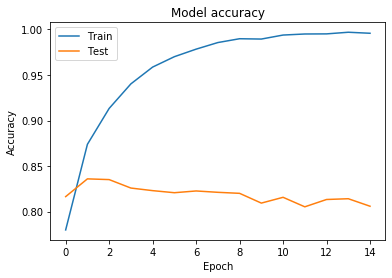

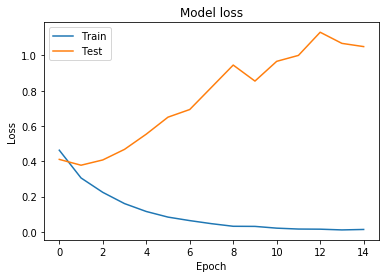

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

This is a quite good training accuracy. However, the test accuracy may still require some improvement (80.5%).
LSTMs (RNNs) can be difficult to improve. The correct choice of batch size, loss algorithm, and optimizer is critical.